In [4]:
import pandas as pd
from src import visualization, utils


In [3]:
data_df = pd.read_csv('train.csv')
print(data_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Age, Cabin and Embarked have missing values. Furthermore, there are fice attributes that are object. Later on, we will impute the NaN values by using the other features to predict them.
As for the objects, we will break them down into categorical features.

done


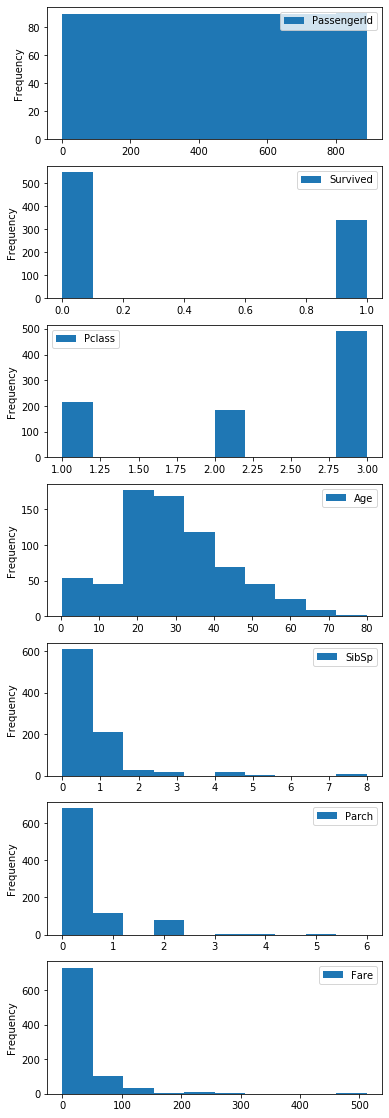

In [5]:
visualization.Visu.feat_hist(data_df)

Notice that the continuous values aren't evenly distributed and are on very different scales. We will later on apply scaling before feeding them to our models.

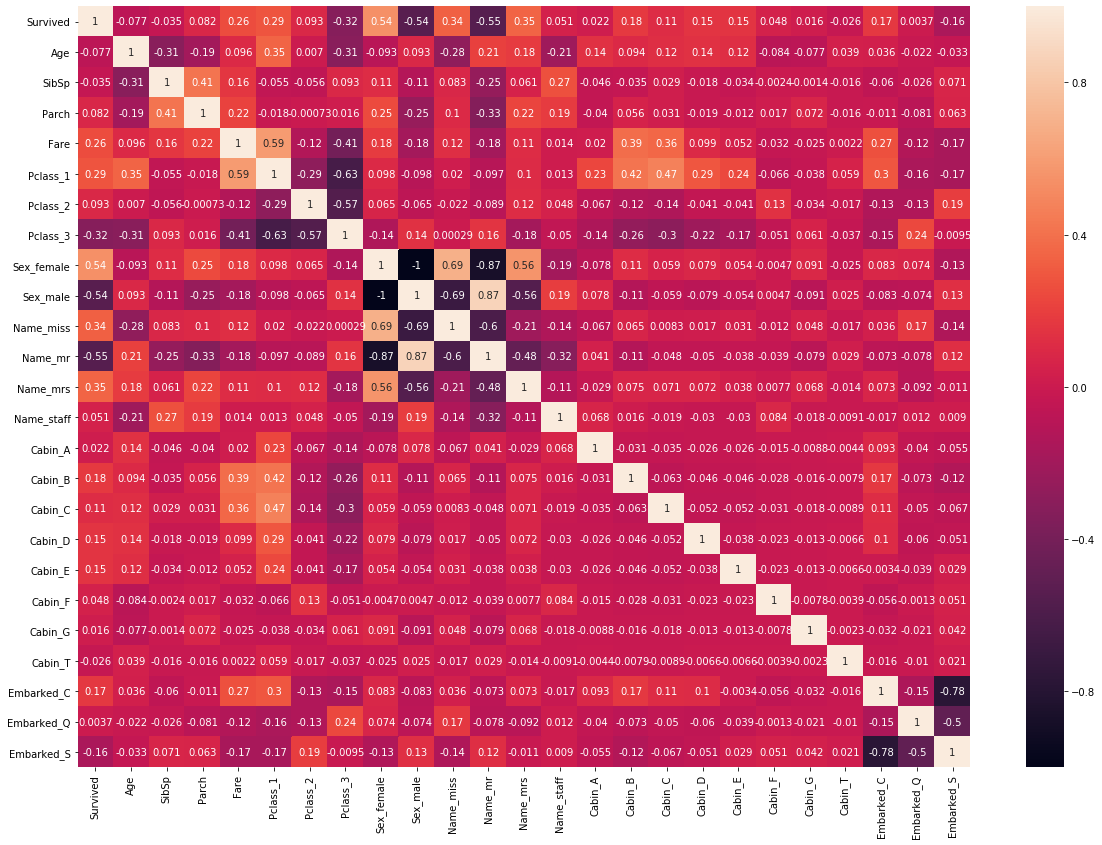

In [9]:
map_df = data_df.apply(utils.Utils.map_apply, axis='columns').drop(columns=['Ticket','PassengerId'])
dummy_df = pd.get_dummies(map_df,columns=['Pclass','Sex','Name','Cabin','Embarked'])
visualization.Visu.heat_map(dummy_df,'all','False')

A large heatmap of all the categorical features one-hot encoded in order to get a better idea of which other attributes withold information on the attributes missing values (Age, Cabin and Embarked).

('Name_mr', 'Name_mrs', 'Name_miss','Parch','SibSp','Pclass_1','Pclass_3','Cabin_A','Cabin_C','Cabin_D','Cabin_E') are interesting when considering Age

('Pclass_1','Pclass_2','Pclass_3') for Cabin

('Name_mr', 'Name_miss','Pclass_1','Pclass_2','Pclass_3','Cabin_B','Cabin_C','Cabin_D') for Embarked



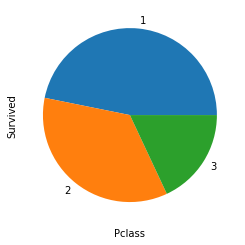

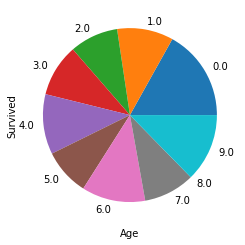

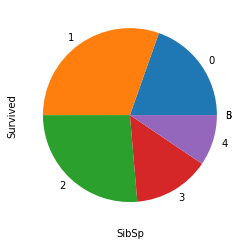

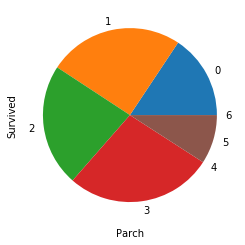

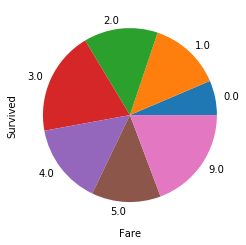

In [5]:
map_df = data_df.apply(utils.Utils.map_apply, axis='columns').drop(columns=['Ticket','PassengerId'])
binned_df = utils.Utils.binning(map_df, ['Age', 'Fare'])

visualization.Visu.pie_chart(map_df)

By looking at these pie charts, we first notice that third class survivors are less frequent than first and second. The really young (age 0 to 10) are slightly more frequent survivors. Survivors that have fewer siblings/spouses are more frequent than those that have more. The same applies for number of parents/children aboard. Finally, we notice that there are slightly more survivors who paid an expensive fare than those who had cheap ones.